### Using principal component analysis to simplify data

- Pros: Reduces complexity of data, indentifies most important features
- Cons: May not be needed, could throw away useful information
- Works with: Numerical values

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Implement PCA

In [2]:
# The PCA algorithm
# Remove the mean
# Compute the covariance matrix
# Find the eigenvalues and eigenvectors of the covariance matrix
# Sort the eigenvalues from largest to smallest
# Take the top N eigenvectors
# Transform the data into the new space created by the top N eigenvectors
def pca(dataMat, topNfeat=9999999):
    # Remove mean
    meanVals = np.mean(dataMat, axis=0)
    meanRemoved = dataMat - meanVals
    covMat = np.cov(meanRemoved, rowvar=False)
    eigVals, eigVects = np.linalg.eig(np.mat(covMat))
    # Sort top N smallest to largest
    eigValInd = np.argsort(eigVals)
    eigValInd = eigValInd[:-(topNfeat + 1): -1]
    redEigVects = eigVects[:, eigValInd]
    # Transform data into new dimensions
    lowDDataMat = meanRemoved * redEigVects
    reconMat = (lowDDataMat * redEigVects.T) + meanVals
    return lowDDataMat, reconMat

### Experiment 1: Toy dataset

In [3]:
def loadDataSet(fileName, delim='\t'):
    fr = open(fileName)
    stringArr = [line.strip().split(delim) for line in fr.readlines()]
    datArr = [list(map(float, line)) for line in stringArr]
    return np.mat(datArr)

In [4]:
dataMat = loadDataSet('testSet.txt')

In [5]:
lowDMat, reconMat = pca(dataMat, 1)

In [6]:
np.shape(lowDMat)

(1000, 1)

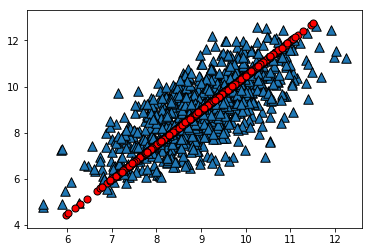

In [7]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(dataMat[:, 0].flatten().A[0], dataMat[:, 1].flatten().A[0],
           marker='^', s=90, edgecolors="black")
ax.scatter(reconMat[:, 0].flatten().A[0], reconMat[:, 1].flatten().A[0],
           marker='o', s=50, c='red', edgecolors="black")

### Semiconductor manufacturing dataset

In [8]:
# Function to replace missing values with mean
def replaceNanWithMean():
    datMat = loadDataSet('secom.data', ' ')
    numFeat = np.shape(datMat)[1]
    for i in range(numFeat):
        # Find mean of non-NaN values
        meanVal = np.mean(datMat[np.nonzero(~np.isnan(datMat[:, i].A))[0], i])
        # Set NaN values to mean
        datMat[np.nonzero(np.isnan(datMat[:, i].A))[0], i] = meanVal
    return datMat

In [9]:
dataMat = replaceNanWithMean()
meanVals = np.mean(dataMat, axis=0)
meanRemoved = dataMat - meanVals
covMat = np.cov(meanRemoved, rowvar=False)
eigVals, eigVects = np.linalg.eig(np.mat(covMat))

D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: ComplexWarning: Casting complex values to real discards the imaginary part
  """Entry point for launching an IPython kernel.


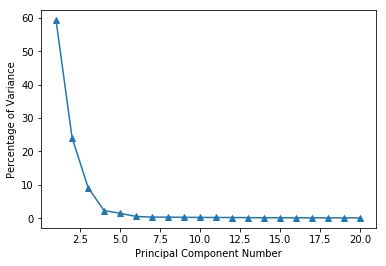

In [10]:
eigVals = np.array(list(map(float, eigVals)))
eigValInd = np.argsort(eigVals)
eigValInd = eigValInd[::-1]
sortedEigVals = eigVals[eigValInd]
total = np.sum(sortedEigVals)
varPercentage = sortedEigVals / total * 100

plt.figure()
plt.plot(range(1, 21), varPercentage[:20], marker='^')
plt.xlabel('Principal Component Number')
plt.ylabel('Percentage of Variance')
plt.show()

In [11]:
lowDMat, reconMat = pca(dataMat, 5)

In [12]:
np.shape(lowDMat)

(1567, 5)